In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from airbnb_priceforecaster.data import AirBnBDataset
from airbnb_priceforecaster.models import build_model
from airbnb_priceforecaster.features import features
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from ml_tooling import Model

In [3]:
data = AirBnBDataset(2020, 5, 30)

In [4]:
best_estimator, results = Model.test_estimators(data, estimators=[ElasticNetCV(), RandomForestRegressor(max_depth=3)], feature_pipeline=features)

[09:20:15] - Training estimator 1/2: ElasticNetCV
[09:20:15] - Scoring estimator...
Output data already exists - skipping...
Data is already preprocessed - skipping...
[09:20:19] - Training estimator 2/2: RandomForestRegressor
[09:20:19] - Scoring estimator...
[09:20:29] - Best estimator: RandomForestRegressor - r2: 0.3727439729206833


In [5]:
model = Model(RandomForestRegressor(n_estimators=1000, max_depth=3), feature_pipeline=features)

In [6]:
result = model.score_estimator(data, cv=10)

[09:20:33] - Scoring estimator...
[09:21:38] - Cross-validating...


In [ ]:
best_estimator, results = model.gridsearch(data, param_grid={"estimator__max_depth": [1, 5, 10, 20, 30]})

[16:04:50] - Starting search...


<AxesSubplot:title={'center':'Learning Curve - RandomForestRegressor'}, xlabel='Number of Examples Used', ylabel='R2 Score'>

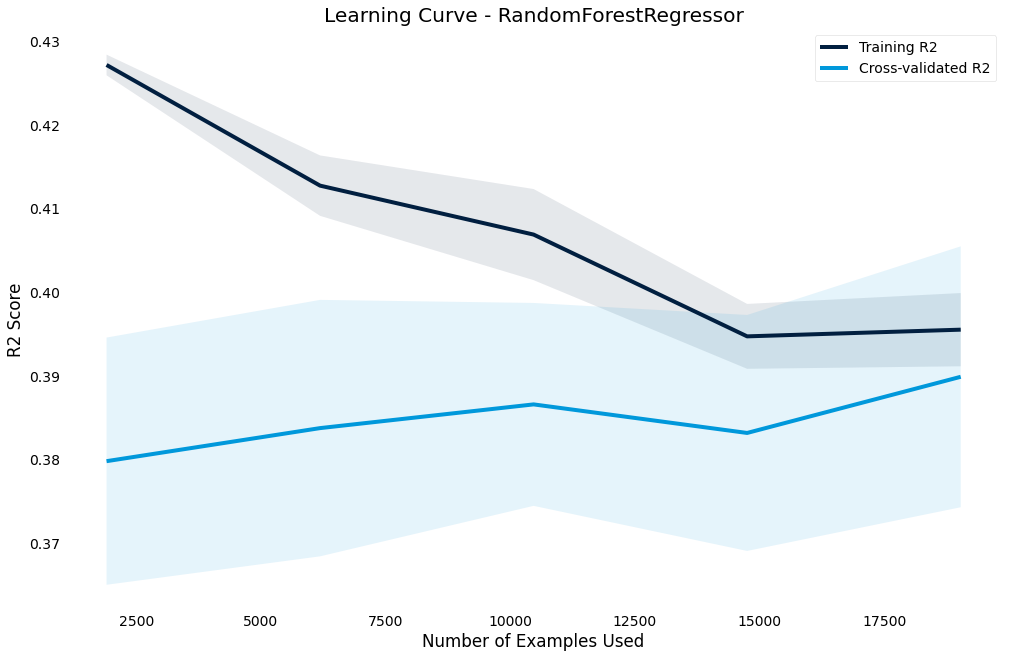

In [7]:
results.plot.learning_curve()

<AxesSubplot:title={'center':'Feature Importances - RandomForestRegressor - Top 20'}, xlabel='Feature Importances', ylabel='Feature Labels'>

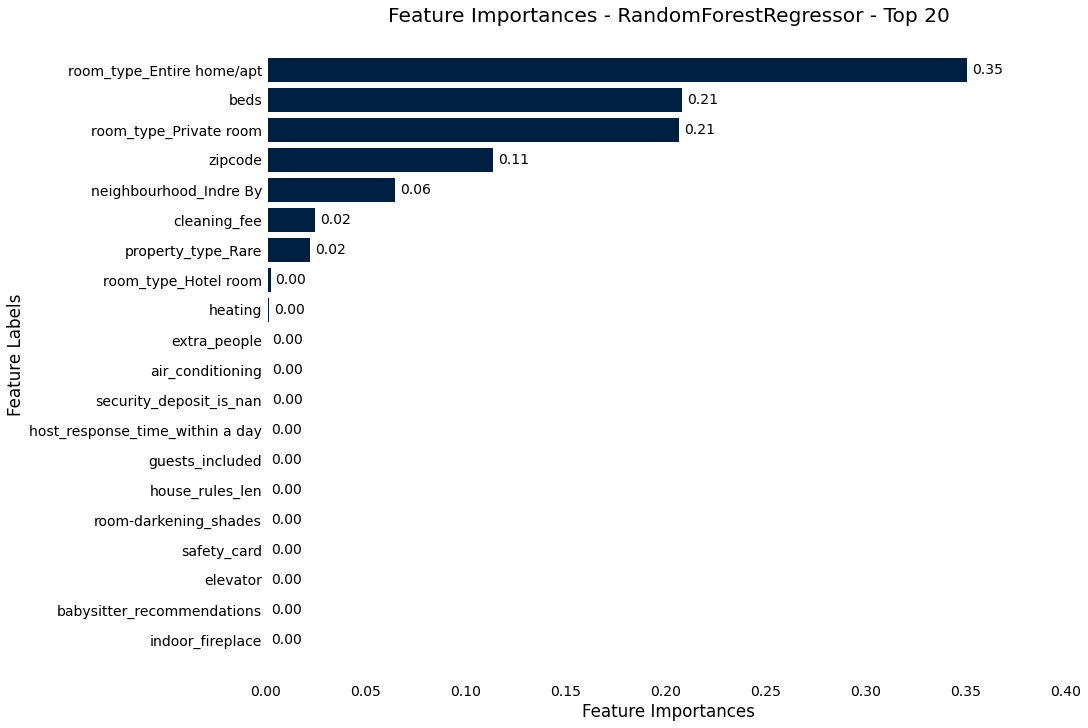

In [6]:
results.plot.feature_importance(top_n=20)

In [5]:
linear_reg = Model(ElasticNetCV(), feature_pipeline=features)

In [6]:
result = linear_reg.score_estimator(data)

[14:33:28] - Scoring estimator...
Output data already exists - skipping...
Data is already preprocessed - skipping...


<AxesSubplot:title={'center':'Feature Importances - ElasticNetCV - Bottom 20'}, xlabel='Coefficients', ylabel='Feature Labels'>

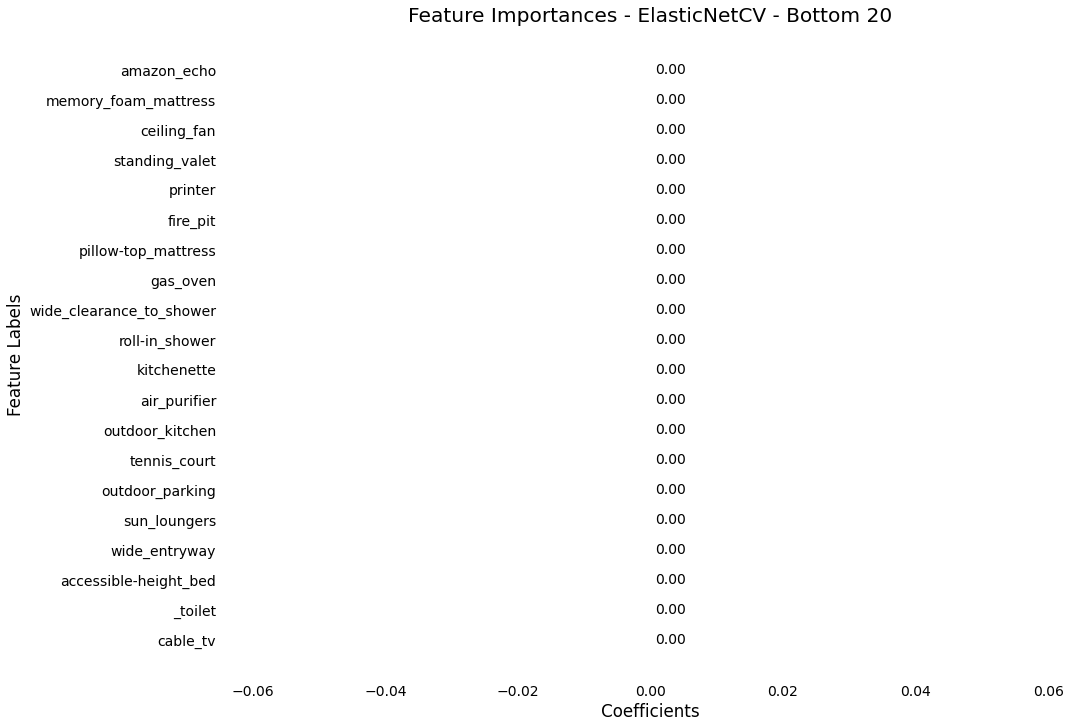

In [7]:
result.plot.feature_importance(bottom_n=20)

<AxesSubplot:title={'center':'Prediction Error - ElasticNetCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

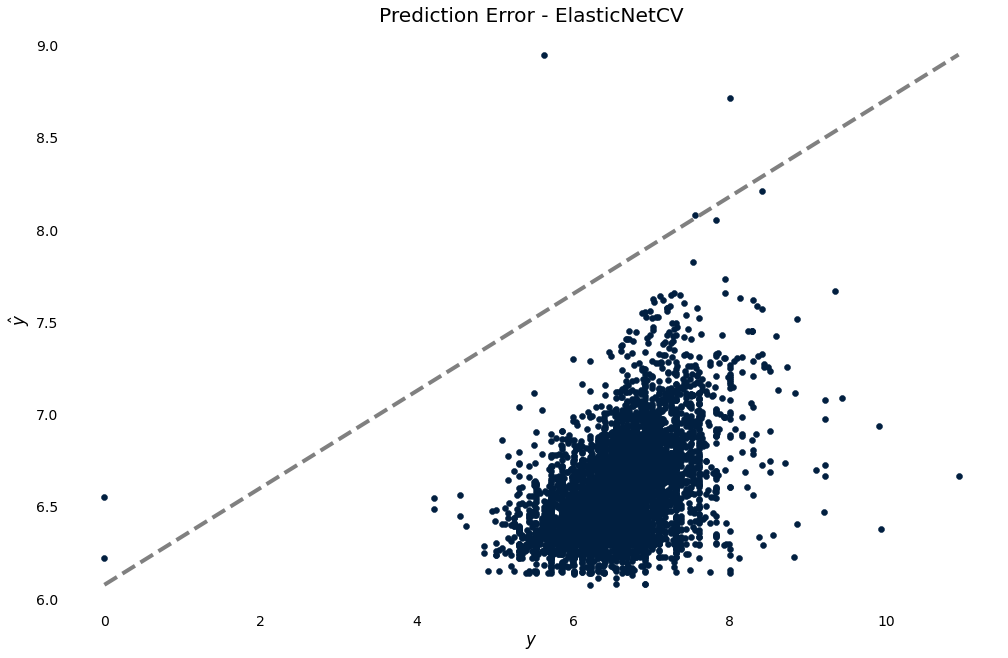

In [8]:
result.plot.prediction_error()

In [4]:
result = model.score_estimator(data)

[14:42:48] - Scoring estimator...
Output data already exists - skipping...
Data is already preprocessed - skipping...


<AxesSubplot:title={'center':'Validation Curve - RandomForestRegressor'}, xlabel='Estimator  Max Depth', ylabel='R2 Score'>

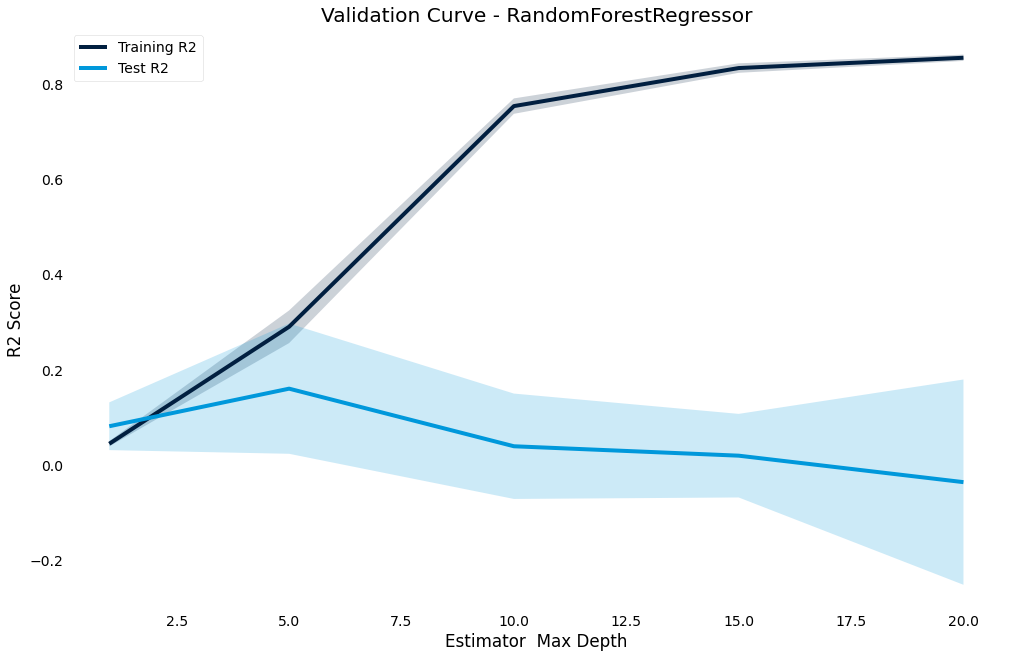

In [5]:
result.plot.validation_curve(param_name="estimator__max_depth", param_range=[1, 5, 10, 15, 20])